Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datesets

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
#shape of the numpy arrays
print((X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


Training data = 60,000 Images
Test data =  10,000 Images

Image dimension ----> 28 x 28
Grayscale Image ----> 1 channel

In [5]:
# printing the 11th image
print(X_train[11])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  31  40 129 234 234 159   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

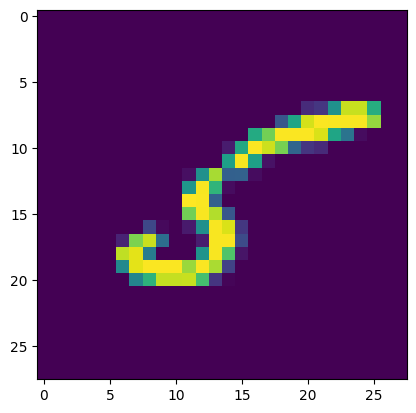

5


In [6]:
#displaying the image
plt.imshow(X_train[11])
plt.show()

# print the corresponding label
print(Y_train[11])

Image Labels

In [7]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [8]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Endcoding

All the images have th esmae dimensions in this dataset. If not, we would have to resize the images to a common dimension

In [9]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [10]:
# printing the 11th image
print(X_train[11])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [11]:
# setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# compiling the Neural Network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
# Training the Neural Network

model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8478 - loss: 0.5197
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9544 - loss: 0.1557
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9667 - loss: 0.1118
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9733 - loss: 0.0879
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9785 - loss: 0.0700
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0477
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0396
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0341
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9909 - loss: 0.0290


Training data accuracy = 99.05%

**Accuracy on Test Data:**

In [14]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9620 - loss: 0.1491
0.9656999707221985


Test data accuracy = 97.26%

In [15]:
print(X_test.shape)

(10000, 28, 28)


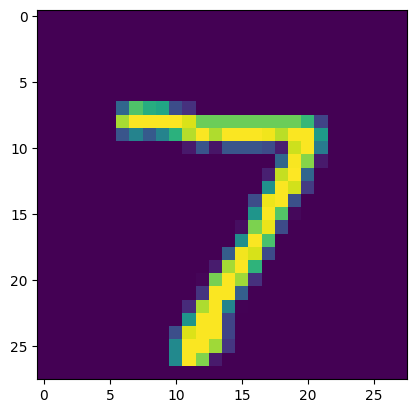

In [16]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [17]:
print(Y_test[0])

7


In [18]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [19]:
print(Y_pred.shape)

(10000, 10)


In [20]:
print(Y_pred[0])

[4.0716771e-03 8.0320751e-03 3.3568924e-03 4.5016608e-01 4.2595399e-08
 6.6415721e-04 7.2471444e-08 9.9999911e-01 9.8280266e-02 7.8919166e-01]


model.prideict() gives the prediction probability of each class for the data point

In [21]:
# converting the prediction probabilities to class label

label_for_first_test_img = np.argmax(Y_pred[0])
print(label_for_first_test_img)

7


In [22]:
# converting the prediction probabilities to class label for all test data points

Y_pred_lables = [np.argmax(i) for i in Y_pred]
print(Y_pred_lables)


[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(4), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test ----> True labels

Y_pred_lables ----> Predicted labels

Confusion Matrix

In [23]:
conf_mat = confusion_matrix(Y_test, Y_pred_lables)
print(conf_mat)

tf.Tensor(
[[ 939    0    0    1    3    4   10    1    3   19]
 [   0 1120    0    3    2    1    5    2    2    0]
 [   1    3  996    7    8    2    3    5    6    1]
 [   0    0    4  987    1    1    0    5    3    9]
 [   0    0    5    1  961    1    8    0    1    5]
 [   1    1    0   18    2  852    8    0    5    5]
 [   2    2    2    0   12    5  932    2    1    0]
 [   0    4   10    3    7    0    1  988    2   13]
 [   2    0    6   14   10    8    6    4  917    7]
 [   1    2    0    5   26    2    0    6    2  965]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

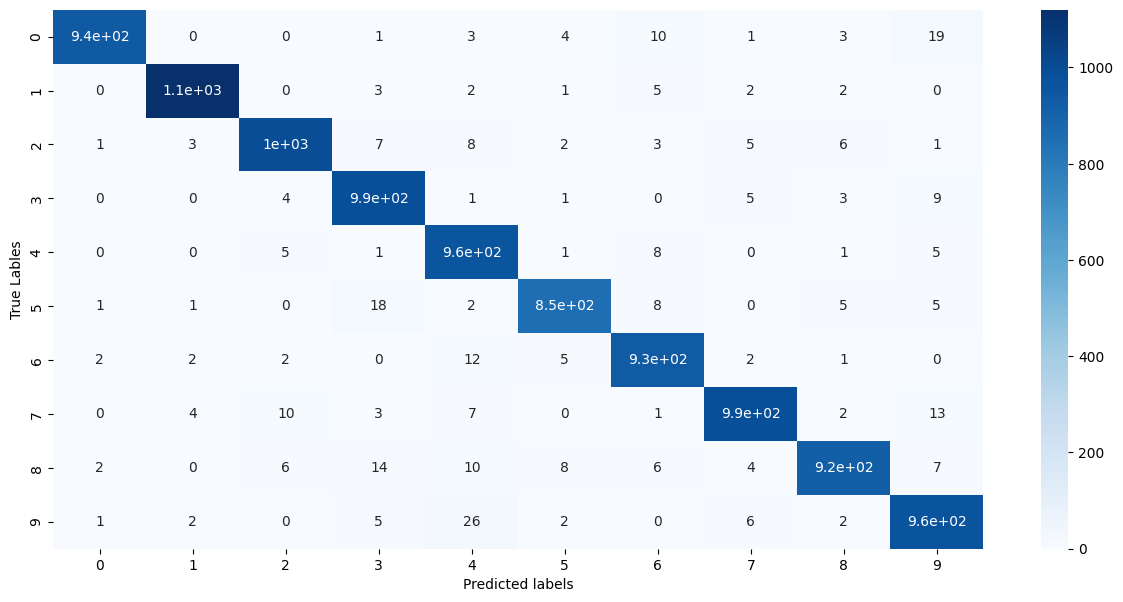

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True, cmap = 'Blues')
plt.ylabel('True Lables')
plt.xlabel('Predicted labels')

Building a Predictive System

In [34]:
# NOTE: This assumes that 'mnist_1.png' exists in the current Colab session.
# Since Colab resets storage each time, re-upload the image before running this cell.

input_image_path = '/mnist_1.png'
input_image = cv2.imread(input_image_path)

In [35]:
type(input_image)

numpy.ndarray

In [36]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


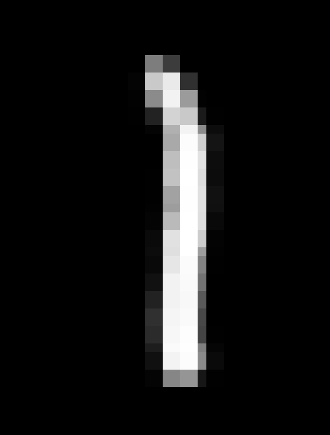

In [37]:
cv2_imshow(input_image)

In [38]:
input_image.shape

(435, 330, 3)

In [39]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(435, 330)

In [40]:
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize.shape

(28, 28)

In [41]:
cv2_imshow(input_image_resize)

In [42]:
input_image_resize = input_image_resize/255

In [43]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [44]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[1.0722292e-08 9.9986035e-01 1.0486640e-01 9.3692803e-01 8.0446213e-01
  2.7786904e-05 1.0006744e-04 9.9503899e-01 6.2111330e-01 7.5937375e-02]]


In [45]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

1


**Predictive System**

Enter path of the image: /mnist_1.png


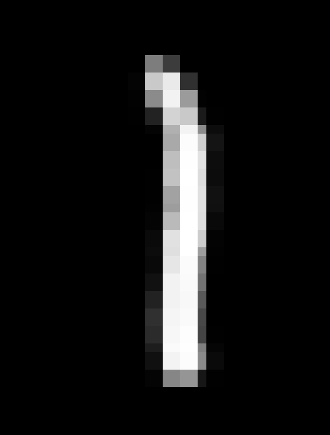

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The handwritten digit is predicted as 1


In [46]:
# NOTE: The input images should be handwritten MNIST-style digits.
# The model performs best when the digit has high contrast against the background.

input_image_path = input('Enter path of the image: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)
print('The handwritten digit is predicted as',input_pred_label)